# Exercises in Classification II

In [333]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

## Exercise 1

In this exercise, we look at the titanic dataset, which is on Moodle in the file "titanic_survival_data.csv". 

Answer the following questions:
1. Load in the dataset, replace the missing values in the age column by the mean age of the column, and encode the Sex column as 0 and 1s.
2. Make an X set of the variables "Pclass", "Sex", "Age" and "SibSp", and take Survived as the y variable. Then make train-test split with 20% of the dataset for testing.
3. Do MinMax scaling on the training dataset.
5. Use 10-fold cross-validation on the training set to train different KNN algorithms and chose a suitable K based on accuracy score.
6. For the chosen K, train a model on the entire training dataset.
7. Create a confusion matrix for the model trained in 4 and calculate accuracy, precision, recall, and F1 score on the test dataset.
8. OPTIONAL: Create a ROC curve for the test dataset as well as the AUC score
9. OPTIONAL: Can you use 10-fold cross validation to get an estimate of the recall instead of accuracy?

1. Load in the dataset, replace the missing values in the age column by the mean age of the column, and encode the Sex column as 0 and 1s.

In [303]:
df = pd.read_csv("titanic_survival_data.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      868 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [305]:
mean_value = df["Age"].mean() 
mean_value

np.float64(29.679271708683473)

In [306]:
df["Age"] = df["Age"].fillna(value=mean_value) 

2. Make an X set of the variables "Pclass", "Sex", "Age" and "SibSp", and take Survived as the y variable. Then make train-test split with 20% of the dataset for testing.

In [307]:
X = df[["Pclass","Age", "SibSp"]]
X = X.join(pd.get_dummies(df[["Sex"]], drop_first=True, dtype=int))
X.head()

,Pclass,Age,SibSp,Sex_male
0,3,22.0,1,1
1,1,38.0,1,0
2,3,26.0,0,0
3,1,35.0,1,0
4,3,35.0,0,1


In [308]:
y = df["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

3. Do MinMax scaling on the training dataset.

In [310]:
minMaxScaler = MinMaxScaler()
X_scaled_train = pd.DataFrame(minMaxScaler.fit_transform(X_train), columns=X_train.columns)
X_scaled_test = pd.DataFrame(minMaxScaler.transform(X_test), columns=X_test.columns)

In [311]:
X_scaled_train.describe()

,Pclass,Age,SibSp,Sex_male
count,712.000000,712.000000,712.000000,712.000000
mean,0.658708,0.369344,0.066538,0.648876
std,0.417726,0.166164,0.137895,0.477657
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.275000,0.000000,0.000000
50%,1.000000,0.370991,0.000000,1.000000
75%,1.000000,0.437500,0.125000,1.000000
max,1.000000,1.000000,1.000000,1.000000


4. Use 10-fold cross-validation on the training set to train different KNN algorithms and chose a suitable K based on accuracy score.

In [312]:
def knnSweepCrossValidation(X, y, maxK, folds):
    kacclist = []
    
    for k in range(2, maxK):
        knn = KNeighborsClassifier(n_neighbors=k)     
        scores = cross_val_score(knn, X, y, cv = folds)
        kacclist.append({"K": k, "CV accuracy": scores.mean()})

    return pd.DataFrame(kacclist)

In [313]:
result = knnSweepCrossValidation(X_scaled_train, y_train, 25, 10)
result

,K,CV accuracy
0,2,0.786522
1,3,0.809038
2,4,0.804851
3,5,0.804910
4,6,0.806221
5,7,0.806221
6,8,0.809018
7,9,0.810485
8,10,0.807610
9,11,0.810446


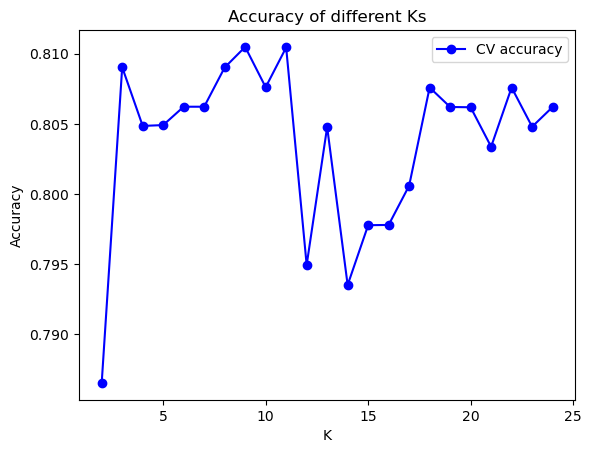

In [314]:
plt.plot(result["K"], result["CV accuracy"], label = 'CV accuracy', color='blue', marker='o', linestyle='solid')
  
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy of different Ks")
plt.legend()

plt.show()

Based on the above result, we choose K=9, because it got the highest accuracy. Secondly the values after K=9 seems to drop quite drastically, confirming we should proceede with K=9

5. For the chosen K, train a model on the entire training dataset.

In [315]:
knn5 = KNeighborsClassifier(n_neighbors=9)

In [316]:
knn5.fit(X_scaled_train, y_train)

KNeighborsClassifier(n_neighbors=9)

6. Create a confusion matrix for the model trained in 4 and calculate accuracy, precision, recall, and F1 score on the test dataset.

In [317]:
y_pred_train = knn5.predict(X_scaled_train)
y_pred_test = knn5.predict(X_scaled_test)

The model seems to be able to somewhat generalize. Taken the small dataset into context, the below accuracy scores are satisfying and the model doesn't seem to be overfit. Let's explore further

In [318]:
accuracy_score(y_train, y_pred_train)

0.8370786516853933

In [319]:
accuracy_score(y_test, y_pred_test)

0.776536312849162

We now make a confusion matrix for the test set:

In [321]:
confusion_matrix(y_test, y_pred_test)

array([[93, 17],
       [23, 46]])

Our confusion matrix shows how there is some class inbalance present. This resuls in bias toward the 0 class. For class 0 we see TN of 93, and FP of 17. For class 1, we see TP of 46 and FN of 23. This questions whether the model actually can generalize

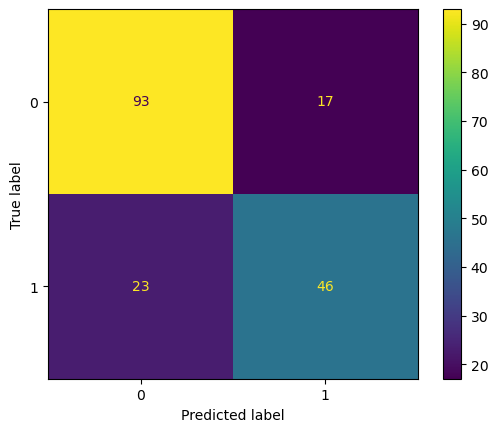

In [323]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test)).plot()
plt.show()

The class inbalance issue becomes more preveliant when calculating the precision, recall and f1 scores:

In [326]:
EvaluationScoreDF = pd.DataFrame({"K": [9],
                                  "Accuracy": accuracy_score(y_test, y_pred_test),
                                  "Precision": precision_score(y_test, y_pred_test),
                                  "Recall": recall_score(y_test, y_pred_test),
                                  "F1": f1_score(y_test, y_pred_test)})
EvaluationScoreDF                            

,K,Accuracy,Precision,Recall,F1
0,9,0.776536,0.730159,0.666667,0.69697


Compared to accuracy, we see a noticeable drop in precision (TP/(TP+FP)) = 0.730159. The precision tells us the fraction of positive classifications that are truly positive. While lower than accuracy, it is still somewhat okay.

For recall (TP/(TP+FN)) = 0.666667, a big drop appears! Recall tells us the fraction of actual positives, that the model classified as positive. In other words, a lot of times the model is not able to detect the positive cases

Finally looking at the F1-score (2*Precision*Recall/(Precision+Recall)) = 0.69697, giving us a harmonic mean of precision and recall, it becomes apparent that the models overall performance in regards of identifying positive cases is moderate, but definetely not optimal. It also higlights the importance of not solely relying on accuracy, especially when working with imbalanced datasets

7. OPTIONAL: Create a ROC curve for the test dataset as well as the AUC score

In [ ]:
X_scaled_test

Showing probability for class 0 and class 1:

In [330]:
knn5.predict_proba(X_scaled_test)

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.22222222, 0.77777778],
       [0.33333333, 0.66666667],
       [0.11111111, 0.88888889],
       [0.77777778, 0.22222222],
       [0.        , 1.        ],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.88888889, 0.11111111],
       [0.88888889, 0.11111111],
       [0.88888889, 0.11111111],
       [0.88888889, 0.11111111],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.88888889, 0.11111111],
       [0.33333333, 0.66666667],
       [0.88888889, 0.11111111],
       [0.11111111, 0.88888889],
       [0.88888889, 0.11111111],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [0.77777778, 0.22222222],
       [0.77777778, 0.22222222],
       [0.        , 1.        ],
       [0.77777778, 0.22222222],
       [0.

In [331]:
y_probs = knn5.predict_proba(X_scaled_test)[:,1]

y_probs

array([0.66666667, 0.33333333, 0.77777778, 0.66666667, 0.88888889,
       0.22222222, 1.        , 0.11111111, 0.        , 1.        ,
       0.66666667, 0.66666667, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.66666667, 0.33333333, 1.        , 0.11111111,
       0.66666667, 0.11111111, 0.88888889, 0.11111111, 0.11111111,
       0.        , 0.22222222, 0.22222222, 1.        , 0.22222222,
       0.33333333, 0.22222222, 1.        , 1.        , 0.88888889,
       0.11111111, 0.        , 0.        , 0.22222222, 0.22222222,
       0.11111111, 0.44444444, 1.        , 1.        , 0.66666667,
       0.11111111, 0.22222222, 0.11111111, 1.        , 0.        ,
       1.        , 0.11111111, 0.55555556, 0.22222222, 0.33333333,
       0.        , 0.11111111, 0.22222222, 0.66666667, 1.        ,
       0.22222222, 0.44444444, 0.55555556, 0.66666667, 0.11111111,
       0.22222222, 0.11111111, 0.33333333, 0.22222222, 0.        ,
       0.22222222, 0.        , 0.11111111, 0.        , 0.22222

We now plot the AUC-ROC curve:

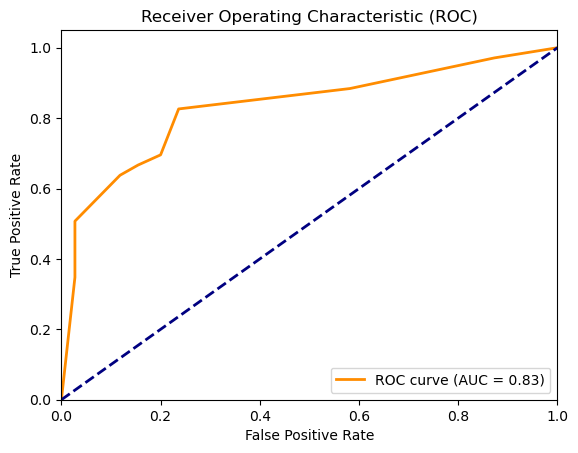

In [332]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [335]:
roc_auc_score(y_test, y_probs)

np.float64(0.829776021080369)

The plot helps us seeing the trade-offs between the True Positive Rate (TP/TP+FN, recall) and the False Positive Rate (FP/FP+FN). It shows us how well the model is able to predict all the positive cases and what effect that has on how often it incorrectly predicts a positive case as negative 

As we work with an imbalanced dataset, AUC gives us a better understanding of how well the model can distinquish between positive and negative classes. 


8. OPTIONAL: Can you use 10-fold cross validation to get an estimate of the recall instead of accuracy?

In [336]:
def knnSweepCrossValidation(X, y, maxK, folds):
    kacclist = []
    
    for k in range(2, maxK):
        knn = KNeighborsClassifier(n_neighbors=k)     
        scores = cross_val_score(knn, X, y, cv = folds, scoring="recall")
        kacclist.append({"K": k, "CV recall": scores.mean()})

    return pd.DataFrame(kacclist)

In [337]:
result = knnSweepCrossValidation(X_scaled_train, y_train, 25, 10)
result

,K,CV recall
0,2,0.556349
1,3,0.713889
2,4,0.622222
3,5,0.684921
4,6,0.637037
5,7,0.673677
6,8,0.633333
7,9,0.677249
8,10,0.644048
9,11,0.669841


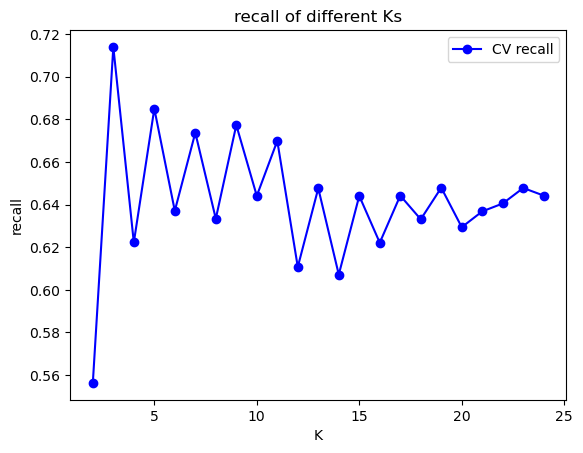

In [338]:
plt.plot(result["K"], result["CV recall"], label = 'CV recall', color='blue', marker='o', linestyle='solid')
  
plt.xlabel('K')
plt.ylabel('recall')
plt.title("recall of different Ks")
plt.legend()

plt.show()

Here K=7 seems to be the best choice! Although K=3 is the highest, there is also a significant drop after.

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

SOlved in Exercises for classification 1, 